<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/xai_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import cv2
import matplotlib.pyplot as plt
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import SGD
from skimage.segmentation import mark_boundaries
from xml.etree import ElementTree

Using TensorFlow backend.


In [0]:
saved_model = load_model('/content/drive/My Drive/xai_model/LG_model.h5')














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
annotation = '/content/drive/My Drive/NEU surface defect database - test split/ANNOTATIONS/patches_212.xml'
image_path = "/content/drive/My Drive/NEU surface defect database - test split/Test/Cr/Cr_178.bmp"

In [0]:
labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}

In [0]:
# shap_Cr = '/content/drive/My Drive/NEU surface defect database - test split/Train/Cr/*.bmp'
# shap_In = '/content/drive/My Drive/NEU surface defect database - test split/Train/In/*.bmp'
# shap_PS = '/content/drive/My Drive/NEU surface defect database - test split/Train/PS/*.bmp'
# shap_Pa = '/content/drive/My Drive/NEU surface defect database - test split/Train/Pa/*.bmp'
# shap_RS = '/content/drive/My Drive/NEU surface defect database - test split/Train/RS/*.bmp'
# shap_Sc = '/content/drive/My Drive/NEU surface defect database - test split/Train/Sc/*.bmp'

# shap_data = [shap_Cr, shap_In, shap_PS, shap_Pa, shap_RS, shap_Sc]

In [0]:
shap_Cr = '/content/drive/My Drive/NEU orig/Cr/*.bmp'
shap_In = '/content/drive/My Drive/NEU orig/In/*.bmp'
shap_PS = '/content/drive/My Drive/NEU orig/PS/*.bmp'
shap_Pa = '/content/drive/My Drive/NEU orig/Pa/*.bmp'
shap_RS = '/content/drive/My Drive/NEU orig/RS/*.bmp'
shap_Sc = '/content/drive/My Drive/NEU orig/Sc/*.bmp'

shap_data = [shap_Cr, shap_In, shap_PS, shap_Pa, shap_RS, shap_Sc]

[[9.9997675e-01 1.7931026e-08 1.2623444e-08 7.7631439e-06 1.1554602e-07
  1.5343698e-05]]
[0]
Crazing


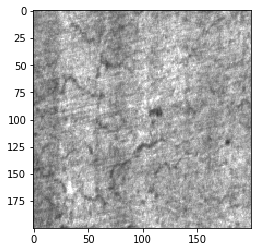

In [0]:
img = image.load_img(image_path, target_size=(200,200))
plt.imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255
result = saved_model.predict(img)
print(result)

prediction = result.argmax(axis=-1)
print(prediction)

output = labels[int(prediction)]
print(output)

[[1, 76, 36, 199], [19, 1, 114, 136], [121, 72, 166, 195], [117, 1, 173, 26]]


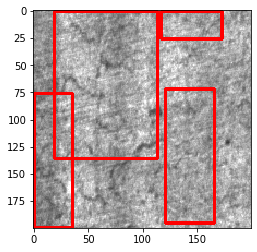

In [0]:
b_img = cv2.imread(image_path)

def extract_boxes(filename):
	tree = ElementTree.parse(filename)
	root = tree.getroot()	
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	return boxes 

boxes = extract_boxes(annotation)
print(boxes)

for i in range(len(boxes)):
  pt1 = boxes[i][0], boxes[i][1]
  pt2 = boxes[i][2], boxes[i][3]
  #print(pt1, pt2)
  cv2.rectangle(b_img, pt1, pt2, (255, 0, 0), 2)
  plt.imshow(b_img)

In [0]:
!pip install shap

In [0]:
# %%time
# import glob
# cv_img = []

# for i in range(len(shap_data)):
#   for ig in glob.glob(shap_data[i]):
#     n = cv2.imread(ig)
#     cv_img.append(n)

# shap_background = np.array(cv_img)

# np.save('/content/drive/My Drive/XAI_results/shap_background_all.npy', shap_background)


In [0]:
shap_background = np.load('/content/drive/My Drive/XAI_results/shap_background_all.npy')
shap_background.shape

(1800, 200, 200, 3)

In [0]:
image_path = "/content/drive/My Drive/NEU surface defect database - test split/Test/Cr/Cr_32.bmp"

(1, 200, 200, 3)

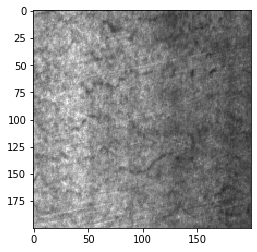

In [0]:
shap_test = image.load_img(image_path) #, grayscale=True)
plt.imshow(shap_test)

shap_test = image.img_to_array(shap_test)
shap_test = np.expand_dims(shap_test, axis=0)
# shap_test /= 255
# shap_test = preprocess_input(shap_test)
shap_test.shape

In [0]:
# for i in range(len(saved_model.layers)):
#   print(i , saved_model.layers[i])

In [0]:
# test_input = np.load('/content/drive/My Drive/xai_model/grad_test_input.npy')

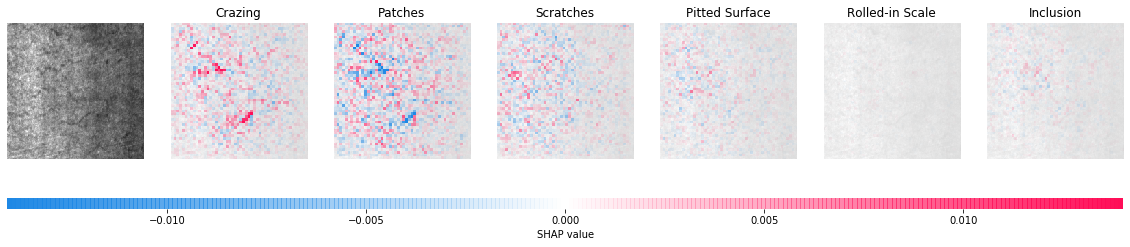

CPU times: user 18.2 s, sys: 763 ms, total: 19 s
Wall time: 19.4 s


In [0]:
%%time
import keras.backend as K
import shap
m = 16

def map2layer(x, layer):
  feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
  return K.get_session().run(saved_model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output),
                           map2layer(shap_background.copy(),m), local_smoothing = 0)    #shap_background.copy()  test_input.copy()

shap_values, indexes = e.shap_values(map2layer(shap_test, m), ranked_outputs=6)

index_names = np.vectorize(lambda l: labels[l])(indexes)

shap.image_plot(shap_values, shap_test, index_names)

In [0]:
indexes

array([[0, 3, 5, 2, 1, 4]])

In [0]:
labels[0]

'Crazing'

In [0]:
len(shap_values)

6

In [0]:
q = shap_values[0]

In [0]:
q.shape

(1, 50, 50, 128)

In [0]:
sv = shap_values[0][0].sum(-1)
svs = (sv).shape
svs

(50, 50)

In [0]:
len(shap_values[0][0].shape)

3

In [0]:
shap_values[0].shape

(1, 50, 50, 128)

In [0]:
(shap_values[0].sum(-1)).shape    # row sum

(1, 50, 50)

In [0]:
abs_vals = np.abs(shap_values[0].sum(-1))

In [0]:
abs_vals.shape

(1, 50, 50)

In [0]:
max_val = np.nanpercentile(abs_vals, 99.9)

In [0]:
max_val

0.008683320749974053

In [0]:
sv.max()

0.01045174804979121

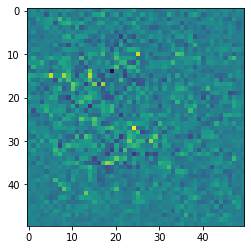

In [0]:
plt.imshow(sv)

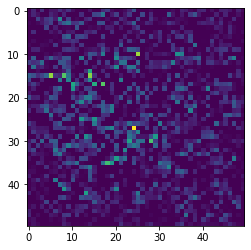

In [0]:
sv_p = np.zeros(sv.shape)
for i in range(sv.shape[0]):
  for j in range(sv.shape[1]):
    if sv[i][j] < 0:
      sv_p[i][j] = 0
    else:
      sv_p[i][j] = sv[i][j]

plt.imshow(sv_p)

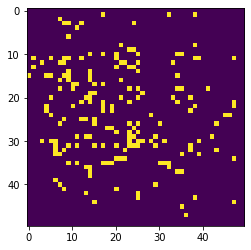

In [0]:
sv_p = sv_p / np.amax(sv_p)

for i in range(sv_p.shape[0]):
  for j in range(sv_p.shape[1]):
    if sv_p[i][j] > 0.25:
      sv_p[i][j] = 1
    else:
      sv_p[i][j] = 0

plt.imshow(sv_p)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


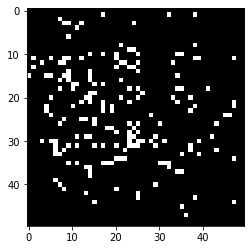

In [0]:
shap_mask = np.zeros((50,50,3))
# shap_img = cv2.imread(image_path)
for i in range(svs[0]):
  for j in range(svs[1]):
    if sv_p[i][j] == 1:
      shap_mask[i][j] = 255
    else:
      shap_mask[i][j] = 0

plt.imshow(shap_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


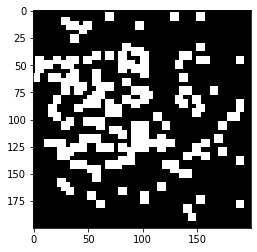

In [0]:
shap_mask_r = cv2.resize(shap_mask, (200, 200))
plt.imshow(shap_mask_r)

In [0]:
shap_mask_r.shape

(200, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


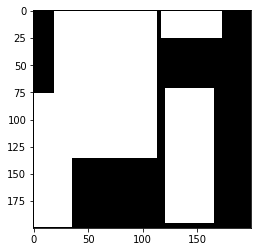

In [0]:
gt_mask = np.zeros(b_img.shape)

for l in range(len(boxes)):
  for i in range(boxes[l][1], boxes[l][3]):
    for j in range(boxes[l][0], boxes[l][2]):
      gt_mask[i][j] = 255 

plt.imshow(gt_mask)

In [0]:
intersection = np.logical_and(gt_mask, shap_mask_r)
union = np.logical_or(gt_mask, shap_mask_r)
iou_score = np.sum(intersection) / np.sum(union)
print("SHAP IOU: ",iou_score)

SHAP IOU:  0.26310606955768245


In [0]:
DATASET_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/Test'
CLASSES = ['Cr', 'In', 'PS', 'Pa', 'RS', 'Sc']

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(DATASET_ROOT,
                                                    class_mode='categorical',
                                                    #interpolation='bilinear',
                                                    target_size=(200, 200),
                                                    batch_size=180,
                                                    shuffle=False,
                                                    classes=CLASSES)
unique, counts = np.unique(test_generator.labels, return_counts=True)
print(dict(zip(CLASSES, counts)))

Found 180 images belonging to 6 classes.
{'Cr': 30, 'In': 30, 'PS': 30, 'Pa': 30, 'RS': 30, 'Sc': 30}


In [0]:
# test_input,y = test_generator.next()
# print(test_input.shape)

#cur_batch_sz = 180

In [0]:
# np.save('/content/drive/My Drive/xai_model/shap_test_input',test_input)
test_input = np.load('/content/drive/My Drive/xai_model/shap_test_input.npy')

In [0]:
test_crazing_idx = np.full(len(test_generator.filenames),False)
test_inclusion_idx = np.full(len(test_generator.filenames),False)
test_pitted_surface_idx = np.full(len(test_generator.filenames),False)
test_patches_idx = np.full(len(test_generator.filenames),False)
test_rolledin_scale_idx = np.full(len(test_generator.filenames),False)       
test_scratches_idx = np.full(len(test_generator.filenames),False)  
for i in range(len(test_generator.filenames)):
    for j in range(len(test_generator.filenames[i])):
        if test_generator.filenames[i][j]== "/":
            break
    correct_class = test_generator.filenames[i][0:j]
    if correct_class == "Cr":
        test_crazing_idx[i] = True
    if correct_class == "In":
        test_inclusion_idx[i] = True
    if correct_class == "PS":
        test_pitted_surface_idx[i] = True
    if correct_class == "Pa":
        test_patches_idx[i] = True
    if correct_class == "RS":
        test_rolledin_scale_idx[i] = True
    if correct_class == "Sc":
        test_scratches_idx[i] = True

# print(len(test_input[test_crazing_idx]))
# print(len(test_input[test_inclusion_idx]))
# print(len(test_input[test_pitted_surface_idx]))
# print(len(test_input[test_patches_idx]))
# print(len(test_input[test_rolledin_scale_idx]))
# print(len(test_input[test_scratches_idx]))

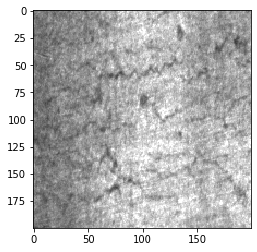

In [0]:
plt.imshow(test_input[test_crazing_idx][16])

# shap_test = np.expand_dims(test_input[test_rolledin_scale_idx][25], axis=0)

In [0]:
path_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/Test/'
path_Cr = path_ROOT+'RS'
path_Cr_Idx = 0
path_In = path_ROOT+'In'
path_In_Idx = 1
path_PS = path_ROOT+'PS'
path_PS_Idx = 2
path_Pa = path_ROOT+'Pa'
path_Pa_Idx = 3
path_RS = path_ROOT+'RS'
path_RS_Idx = 4
path_Sc = path_ROOT+'Sc'
path_Sc_Idx = 5

In [0]:
path = path_RS
Idx = path_RS_Idx

test_files = []
for r, d, f in os.walk(path):
  for file in f:
    if '.bmp' in file:
      test_files.append(os.path.join(r, file))

(1, 200, 200, 3)

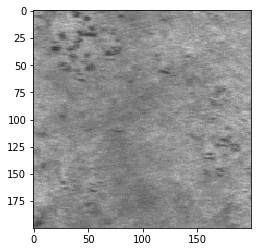

In [216]:
shap_test = image.load_img(test_files[12])
plt.imshow(shap_test)

shap_test = image.img_to_array(shap_test)
shap_test = np.expand_dims(shap_test, axis=0)
shap_test.shape

In [0]:
# shap_test = np.expand_dims(test_input[test_rolledin_scale_idx][23], axis=0)

In [218]:
# shap_background.shape
shap_background_train = np.load('/content/drive/My Drive/XAI_results/shap_background_train.npy')
shap_background_train.shape

(1620, 200, 200, 3)

In [0]:
# import keras.backend as K
# import shap
# m = 16

# def map2layer(x, layer):
#   feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
#   return K.get_session().run(saved_model.layers[layer].input, feed_dict)

# e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output),
#                            map2layer(shap_background.copy(),m), local_smoothing = 0)    #shap_background.copy()  test_input.copy()

# shap_values, indexes = e.shap_values(map2layer(shap_test, m), ranked_outputs=6)

# index_names = np.vectorize(lambda l: labels[l])(indexes)

# shap.image_plot(shap_values, shap_test, index_names)

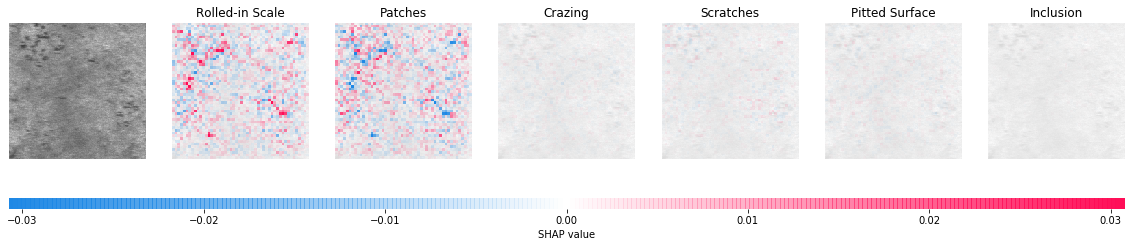

In [220]:
import keras.backend as K
import shap
m = 16

def map2layer(x, layer):
  feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
  return K.get_session().run(saved_model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output),
                           map2layer(shap_background_train.copy(),m), local_smoothing = 0)    #shap_background.copy()  

shap_values, indexes = e.shap_values(map2layer(shap_test, m), ranked_outputs=6)

index_names = np.vectorize(lambda l: labels[l])(indexes)

shap.image_plot(shap_values, shap_test, index_names)

In [221]:
len(shap_values)

6

In [222]:
# labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}

e = list(indexes[0]).index(Idx)
e

0

In [0]:
# shap_values[e]

In [224]:
sv = shap_values[e][0].sum(-1)
svs = (sv).shape
svs

(50, 50)

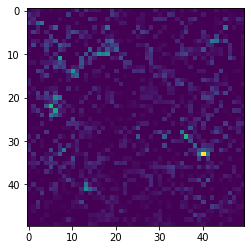

In [225]:
# plt.imshow(sv)

sv_p = np.zeros(sv.shape)
for i in range(sv.shape[0]):
  for j in range(sv.shape[1]):
    if sv[i][j] < 0:
      sv_p[i][j] = 0
    else:
      sv_p[i][j] = sv[i][j]

plt.imshow(sv_p)

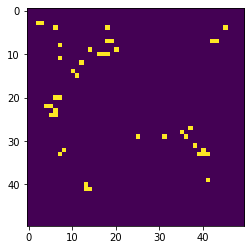

In [226]:
sv_p = sv_p / np.amax(sv_p)

for i in range(sv_p.shape[0]):
  for j in range(sv_p.shape[1]):
    if sv_p[i][j] > 0.25:
      sv_p[i][j] = 1
    else:
      sv_p[i][j] = 0

plt.imshow(sv_p)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


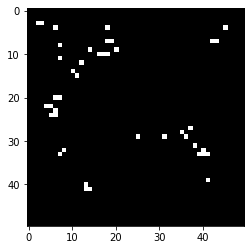

In [227]:
shap_mask = np.zeros((50,50,3))
# shap_img = cv2.imread(image_path)
for i in range(svs[0]):
  for j in range(svs[1]):
    if sv_p[i][j] == 1:
      shap_mask[i][j] = 255
    else:
      shap_mask[i][j] = 0

plt.imshow(shap_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


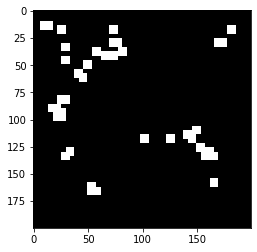

In [228]:
shap_mask_r = cv2.resize(shap_mask, (200, 200))
plt.imshow(shap_mask_r)